### 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document

- numpy
- pandas
- seaborn
- matplotlib

#### 무대뽀로 하기 힘들다면? 다음 Hint와 함께 시도해봅시다.

1. 데이터를 톺아봅시다.

- 각 데이터는 어떤 자료형을 가지고 있나요?
- 데이터에 **결측치**는 없나요?
- 데이터의 자료형을 바꿔줄 필요가 있나요? -> 범주형의 One-hot encoding

2. 데이터에 대한 가설을 세워봅시다.

- 가설은 개인의 경험에 의해서 도출되어도 상관이 없습니다.
- 가설은 명확할수록 좋습니다. ex)Titanic Data에서 Survival 여부와 성별에는 상관관계가 있다!

3. 가설을 검증하기 위한 증거를 찾아봅시다.

- 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique을 써줘야 합니다.
- .groupby()를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
- .merge()를 통해서 두 개 이상의 dataFrame을 합치면 어떨까요?
- 시각화를 통해 일목요연하게 보여주면 더욱 좋겠죠?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
lotto_df = pd.read_csv('./Lotto.csv')

In [3]:
lotto_df

,lottery,date,num1,num2,num3,num4,num5,num6,bonus
0,1,2002-12-07,10,23,29,33,37,40,16
1,2,2002-12-14,9,13,21,25,32,42,2
2,3,2002-12-21,11,16,19,21,27,31,30
3,4,2002-12-28,14,27,30,31,40,42,2
4,5,2003-01-04,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...,...
955,956,2021-03-27,10,11,20,21,25,41,40
956,957,2021-04-03,4,15,24,35,36,40,1
957,958,2021-04-10,2,9,10,16,35,37,1
958,959,2021-04-17,1,14,15,24,40,41,35


In [11]:
n1 = lotto_df['num1'].value_counts()
n2 = lotto_df['num2'].value_counts()
n3 = lotto_df['num3'].value_counts()
n4 = lotto_df['num4'].value_counts()
n5 = lotto_df['num5'].value_counts()
n6 = lotto_df['num6'].value_counts()

print(n1, n2, n3, n4, n5, n6)

1     134
2     108
3      94
4      90
5      81
6      69
7      60
8      46
10     39
9      34
11     33
12     32
14     28
13     24
16     21
17     15
19     12
15     11
18      7
21      5
20      4
22      3
23      3
24      2
26      2
25      1
29      1
35      1
Name: num1, dtype: int64 10    62
8     62
7     56
12    56
11    55
15    51
9     49
14    46
13    44
17    42
18    42
5     41
4     39
6     35
16    33
3     31
20    27
19    26
21    26
22    20
2     19
23    18
25    16
27    15
24    14
26     8
30     6
29     5
28     4
32     3
34     3
31     2
33     2
36     1
37     1
Name: num2, dtype: int64 20    55
18    54
13    53
19    53
17    45
15    44
14    41
24    40
16    39
21    38
22    38
12    34
23    33
28    33
26    33
27    32
10    31
25    31
30    29
11    29
29    27
31    20
8     17
33    14
9     13
6     11
35    11
7     10
32    10
34    10
37     8
36     6
5      5
4      4
38     3
3      3
39     2
40     1
Name: num3, d

In [48]:
LOTTO_df = pd.concat([n1, n2, n3, n4, n5, n6], axis=1)
LOTTO = LOTTO_df.groupby([i for i in range(1, 46)]).sum()
LOTTO = LOTTO.loc[[i for i in range( 1, 46)]].sum(axis=1)
print(LOTTO)

1     134.0
2     127.0
3     128.0
4     133.0
5     128.0
6     118.0
7     126.0
8     128.0
9     101.0
10    134.0
11    129.0
12    137.0
13    135.0
14    135.0
15    131.0
16    124.0
17    137.0
18    140.0
19    131.0
20    134.0
21    127.0
22    110.0
23    114.0
24    128.0
25    123.0
26    127.0
27    141.0
28    119.0
29    115.0
30    118.0
31    129.0
32    111.0
33    134.0
34    147.0
35    119.0
36    128.0
37    131.0
38    128.0
39    137.0
40    139.0
41    119.0
42    124.0
43    141.0
44    127.0
45    134.0
dtype: float64


In [50]:
lotto_mean = LOTTO.sum()/46

125.21739130434783

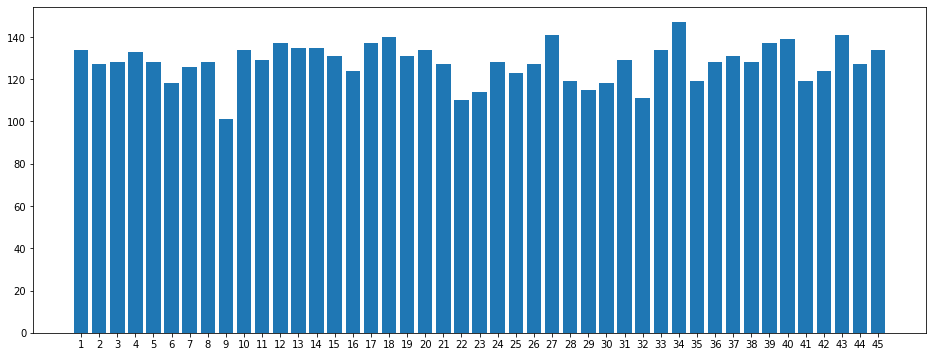

In [56]:
plt.figure(figsize=(16, 6))
plt.bar(LOTTO.index, LOTTO)
plt.xticks(np.arange(1, 46, 1))

plt.show()

## 통계에서 모든 숫자는 실험의 수가 많아질수록, 모든 값이 일정해지는 경향을 띈다고 배웠기 때문에, 빈도수가 높은 상위 70%를 제외한 나머지 숫자들로 랜덤 조합으로 로또를 구매하면 확률이 높아지지 않을까?

In [63]:
# 하위 14개 숫자

LOTTO.sort_values().head(14).index.sort_values()

Int64Index([6, 7, 9, 16, 22, 23, 25, 28, 29, 30, 32, 35, 41, 42], dtype='int64')

6, 7, 9, 16, 22, 23, 25, 28, 29, 30, 32, 35, 41, 42